In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline

### Assets of interest: P&G and S&P500

In [2]:
assets = ['PG', '^GSPC']
pf_data = pd.DataFrame()

for a in assets:
    pf_data[a] = wb.DataReader(a, data_source = 'yahoo', start = '2010-01-01')['Adj Close']

In [3]:
pf_data.tail()

,PG,^GSPC
Date,,
2021-04-28,131.399994,4183.180176
2021-04-29,132.509995,4211.470215
2021-04-30,133.419998,4181.169922
2021-05-03,135.000000,4192.660156
2021-05-04,134.539993,4164.660156


<AxesSubplot:xlabel='Date'>

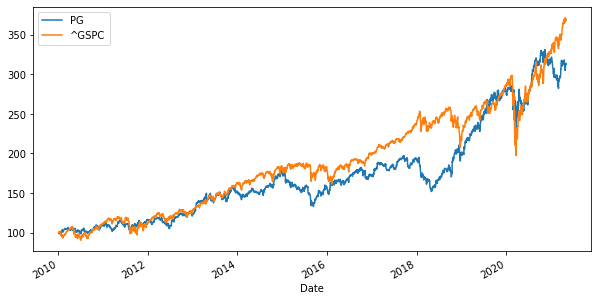

In [4]:
(pf_data/pf_data.iloc[0]*100).plot(figsize=(10,5))
    

In [5]:
log_returns = np.log(pf_data/pf_data.shift(1))

In [6]:
log_returns.mean() *250

PG       0.099987
^GSPC    0.114111
dtype: float64

In [7]:
log_returns.cov() *250

,PG,^GSPC
PG,0.029124,0.017567
^GSPC,0.017567,0.030311


In [8]:
log_returns.corr()

,PG,^GSPC
PG,1.000000,0.591257
^GSPC,0.591257,1.000000


In [9]:
num_assets = len(assets)
num_assets

2

##### Creating two randomly generated weights with a sum of 1.0

In [10]:
weights = np.random.random(num_assets)
weights /= np.sum(weights)
weights

array([0.50586406, 0.49413594])

In [11]:
weights[0] + weights[1]

1.0

##### Expected portfolio return

In [12]:
np.sum(weights * log_returns.mean()) *250

0.1069660102491586

##### Expected portfolio variance

In [13]:
np.dot(weights.T, np.dot(log_returns.cov() *250, weights))

0.02363589965782291

##### Expected portfolio volitality

In [14]:
np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() *250, weights)))

0.15373971399031192

### Simulation for 1000 combianations
##### #1 two empty lists
##### #2 randomly generated weights
##### #3 append returns & volatility
##### #4 organise the results in arrays

In [15]:
pfolio_returns = []
pfolio_volatilities = []

for x in range (1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * log_returns.mean()) *250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() *250, weights))))

pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)

pfolio_returns, pfolio_volatilities

(array([0.10503011, 0.10141946, 0.11301825, 0.11071359, 0.10269883,
        0.10775063, 0.10873551, 0.10074636, 0.10924186, 0.10694144,
        0.10318462, 0.10897741, 0.11036059, 0.11388765, 0.10420043,
        0.10699452, 0.1079352 , 0.1076039 , 0.1063323 , 0.10773814,
        0.10896757, 0.10795724, 0.11276967, 0.11051485, 0.11012832,
        0.10713472, 0.10695148, 0.10388303, 0.1101165 , 0.10954794,
        0.10500172, 0.10718419, 0.10436609, 0.105685  , 0.11242261,
        0.10062098, 0.10728926, 0.10816549, 0.10482904, 0.10545537,
        0.11290571, 0.10894487, 0.10662632, 0.11154683, 0.10414324,
        0.10760228, 0.10641801, 0.10051071, 0.11147785, 0.10863867,
        0.10361978, 0.10355009, 0.10921784, 0.10100073, 0.10234218,
        0.10675508, 0.10673343, 0.10721827, 0.11291976, 0.10749336,
        0.10801271, 0.11013862, 0.11410788, 0.10374351, 0.10698423,
        0.1077625 , 0.10677235, 0.1124166 , 0.10428325, 0.1075391 ,
        0.10799245, 0.10588569, 0.1067644 , 0.11

In [16]:
portfolios = pd.DataFrame({'Return': pfolio_returns, 'Volatility': pfolio_volatilities})

In [17]:
portfolios.head()

,Return,Volatility
0,0.105030,0.154819
1,0.101419,0.164406
2,0.113018,0.168774
3,0.110714,0.159957
4,0.102699,0.159942


In [18]:
portfolios.tail()

,Return,Volatility
995,0.106439,0.153740
996,0.110887,0.160496
997,0.104409,0.155785
998,0.104471,0.155675
999,0.102544,0.160421


Text(0, 0.5, 'Expected Return')

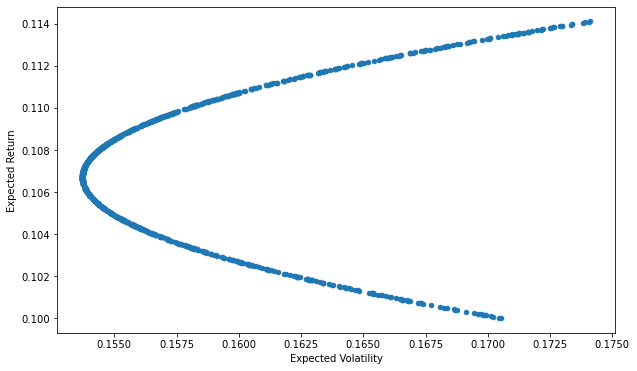

In [19]:
portfolios.plot(x='Volatility', y='Return', kind='scatter', figsize=(10,6));
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')